# Modeling

In [158]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [159]:
plants = pd.read_csv('../data/data_cleaned/plants.csv')

In [160]:
plants.head()

,id,created_utc,title,self_text,comments,score,upvote_ratio,subreddit
0,uw3f46,1.653321e+09,I feel attacked.,no_text,793,63651,0.94,1
1,v4z9xu,1.654380e+09,The liberals are trying to make my plants gay!!,no_text,1281,54217,0.82,1
2,q0hqvn,1.633268e+09,This was supposed to be a plant progress post ...,no_text,572,45198,0.96,1
3,i5rplr,1.596855e+09,My grandpa made me a plant stand 💖,no_text,451,40218,0.96,1
4,lkjvss,1.613414e+09,I let my Golden Pothos get outta hand for just...,no_text,593,39723,0.98,1


In [161]:
plants.shape

(9271, 8)

In [162]:
X = plants['title']
y = plants['subreddit']

In [163]:
X.shape

(9271,)

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

In [165]:
X_train.shape

(6953,)

In [166]:
cvec = CountVectorizer(stop_words = "english")

In [167]:
X_train_df = pd.DataFrame(cvec.fit_transform(X_train).todense(),
                          columns=cvec.get_feature_names_out())

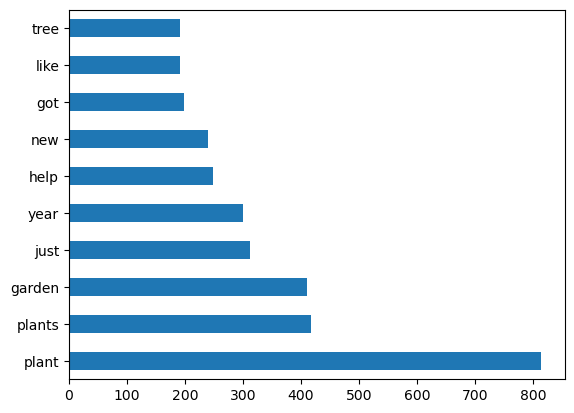

In [168]:
X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');

In [169]:
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('log_reg', LogisticRegression())
])

In [170]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer(stop_words='english')),
                ('log_reg', LogisticRegression())])

In [171]:
pipe.score(X_train, y_train)

0.9375809003307924

In [172]:
pipe.score(X_test, y_test)

0.8356341673856773

In [173]:
1 - y.mean()

0.4891597454427785

In [174]:
pipe.get_params()

{'memory': None,
 'steps': [('cvec', CountVectorizer(stop_words='english')),
  ('log_reg', LogisticRegression())],
 'verbose': False,
 'cvec': CountVectorizer(stop_words='english'),
 'log_reg': LogisticRegression(),
 'cvec__analyzer': 'word',
 'cvec__binary': False,
 'cvec__decode_error': 'strict',
 'cvec__dtype': numpy.int64,
 'cvec__encoding': 'utf-8',
 'cvec__input': 'content',
 'cvec__lowercase': True,
 'cvec__max_df': 1.0,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__preprocessor': None,
 'cvec__stop_words': 'english',
 'cvec__strip_accents': None,
 'cvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cvec__tokenizer': None,
 'cvec__vocabulary': None,
 'log_reg__C': 1.0,
 'log_reg__class_weight': None,
 'log_reg__dual': False,
 'log_reg__fit_intercept': True,
 'log_reg__intercept_scaling': 1,
 'log_reg__l1_ratio': None,
 'log_reg__max_iter': 100,
 'log_reg__multi_class': 'auto',
 'log_reg__n_jobs': None,
 'log_reg__penalty': 'l2',
 'log_reg__rand

In [175]:
pipe_params = {
    'cvec__max_features': [5_000],
    'cvec__min_df': [2],
    'cvec__max_df': [.9],
    'cvec__ngram_range': [(1, 2)],
    'cvec__stop_words': [None, 'english']
}

In [176]:
gs = GridSearchCV(pipe,
                  param_grid = pipe_params,
                  cv = 5)

In [177]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words='english')),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'cvec__max_df': [0.9], 'cvec__max_features': [5000],
                         'cvec__min_df': [2], 'cvec__ngram_range': [(1, 2)],
                         'cvec__stop_words': [None, 'english']})

In [178]:
gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 5000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': 'english'}

In [179]:
gs.score(X_train, y_train)

0.9282324176614412

In [180]:
gs.score(X_test, y_test)

0.8334771354616048

In [181]:
preds = gs.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

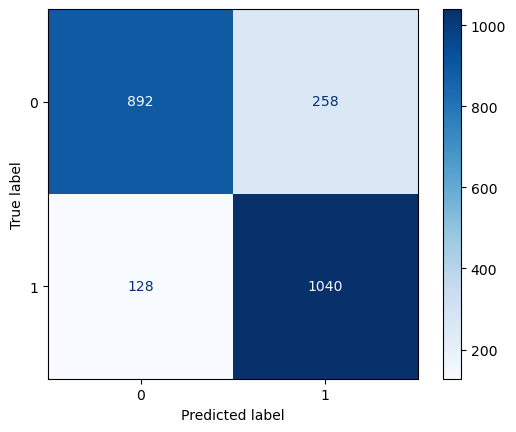

In [182]:
ConfusionMatrixDisplay.from_estimator(gs, X_test, y_test, cmap='Blues');

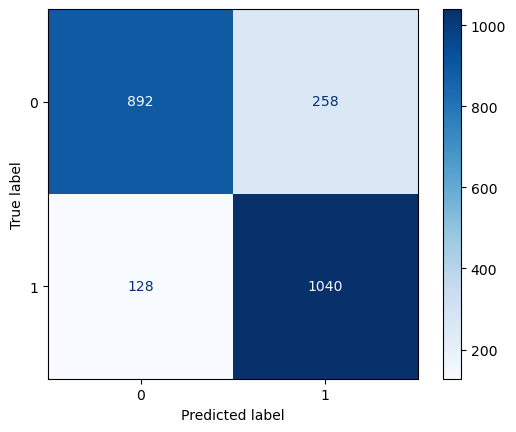

In [185]:
ConfusionMatrixDisplay.from_predictions(y_test, preds, cmap='Blues');

In [184]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds, digits = 5))

              precision    recall  f1-score   support

           0    0.87451   0.77565   0.82212      1150
           1    0.80123   0.89041   0.84347      1168

    accuracy                        0.83348      2318
   macro avg    0.83787   0.83303   0.83280      2318
weighted avg    0.83759   0.83348   0.83288      2318

